In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
name = 'Basil-ParamMoteur'

path = '../Assets/Resources/Intentions/DataSimulation/Bloc/BasilMoteur/'
path2 = '-Basil_newParamMoteur'
contribMin = 0.5
contribMax = 0.4
increment = 0.05

realTest = True
Contrib01 = pd.read_csv(path + str(0.1) + '-' + str(0.9) + path2 + '.csv', sep = ";", decimal = ',')
#     Contrib01 = Contrib01.dropna()
    

contribDist = 0.1
contribAngle = 0.9
    
list_names = Contrib01.columns.values
for i in range(0, math.floor(Contrib01.columns.size/2)):
    del Contrib01[list_names[2*i]]

    Contrib01.columns.values[i] = list_names[2*i]
    Contrib01.index = Contrib01['Time']
del Contrib01['Time']
Contrib01.describe()

Contrib01['Weight_OOI_Picked'] = [contribDist*(1/(1 + float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Dist'].values[i])) + contribAngle*math.exp(3*math.cos(float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Angle'].values[i])) - 1)) for i in range(0, Contrib01.index.size)]
Contrib01['WeightUnityOOIPicked'] = [float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_weight'].values[i]) for i in range(0, Contrib01.index.size)]

Contrib01['UserXZ'] = [float(Contrib01['PosUserZ'].values[i])**2 + float(Contrib01['PosUserX'].values[i])**2 for i in range(0, Contrib01.index.size)]
Contrib01['ProxyXZ'] = [float(Contrib01['PosProxyX'].values[i])**2 + float(Contrib01['PosProxyZ'].values[i])**2 for i in range(0, Contrib01.index.size)]
Contrib01['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[i])**2 + float(Contrib01['PosCoVR_EncZ'].values[i])**2 for i in range(0,Contrib01.index.size)]
j = 0
list_i = []
for i in range(20, Contrib01.index.size):
    if(float(Contrib01['WeightUnityOOIPicked'].values[i]) == 1) and (float(Contrib01['WeightUnityOOIPicked'].values[i-1]) != 1):
        k = float(Contrib01.index.values[i])
    if ((float(Contrib01['TargetToTouch.x'].values[i]) != float(Contrib01['TargetToTouch.x'].values[i-1]))):
        #and (abs(float(Contrib01['PosHandX'].values[i-1])) - abs(float(Contrib01['PosTargetX'].values[i-1])) < 0.05) and float(Contrib01['TargetToTouch.z'].values[i]) != float(Contrib01['TargetToTouch.z'].values[i-1]) and (abs(float(Contrib01['PosHandZ'].values[i-1])) - abs(float(Contrib01['PosTargetZ'].values[i-1])) < 0.05)):
        j = j + 1
        list_i.append(i-1)
        time_diff = float(Contrib01.index.values[i]) - k
print(list_i)

Comparison = None
Comparison = pd.DataFrame()
    
Comparison['PosTargetToTouch'] = [float(Contrib01['TargetToTouch.x'].values[list_i[i]])**2 + float(Contrib01['TargetToTouch.z'].values[list_i[i]])**2 for i in range(0,j)]
Comparison['PosUserXZ'] = [float(Contrib01['PosUserX'].values[list_i[i]])**2 + float(Contrib01['PosUserZ'].values[list_i[i]])**2 for i in range(0,j)]
#Comparison['PosHandUser'] = Contrib01['PosUserX']**2 + Contrib01['PosUserZ']**2
# MEASURE DISTANCE POSHANDUSER AND CoVROPT
Comparison['PosHandUserXZ'] = [float(Contrib01['PosHandX'].values[list_i[i]])**2 + float(Contrib01['PosHandZ'].values[list_i[i]])**2 for i in range(0,j)]
Comparison['PosHandOptXZ'] = [float(Contrib01['PosHandOptX'].values[list_i[i]])**2 + float(Contrib01['PosHandOptZ'].values[list_i[i]])**2 for i in range(0,j)]
Comparison['PosProxyXZ'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 for i in range(0,j)]
Comparison['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[list_i[i]])**2 + float(Contrib01['PosCoVR_EncZ'].values[list_i[i]])**2 for i in range(0,j)]
#Comparison['PosCoVR_OptXZ'] = [Contrib01['PosCoVR_OptX'].values[list_i[i]]**2 + Contrib01['PosCoVR_OptZ'].values[list_i[i]]**2 for i in range(0,j)]

if(realTest):
    Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosCoVR_EncXZ']
else:
    Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosProxyXZ']
#Comparison['DistanceProxyCoVR'] = [Contrib01['PosTargetX'].values[list_i[i]]**2 + Contrib01['PosTargetZ'].values[list_i[i]]**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]

Comparison['DistanceProxyTargetCoVR'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]
Comparison['AbsoluteDistanceToTarget'] = Comparison['DistanceToTarget'].abs()
Comparison['AbsoluteDistanceProxCoVR'] = Comparison['DistanceProxyTargetCoVR'].abs()

Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['PosHandUserXZ'] - Comparison['PosCoVR_EncXZ']
Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['AbsoluteDist_Hand_CoVR'].abs()


#Comparison['AbsoluteDist_Hand_CoVR_Opt'] = Comparison['PosHandOptXZ'] - Comparison['PosCoVR_OptXZ']
#Comparison['AbsoluteDist_Hand_CoVR_Opt'] = Comparison['AbsoluteDist_Hand_CoVR_Opt'].abs()
Comparison['WeightUnity'] = [float(Contrib01['WeightUnityOOIPicked'].values[list_i[i]])**2 for i in range(0,j)]
#GET I FOR WEIGHT = 1, MEASURE TIME DIFFERENCE

Comparison['NbTargetsInScene'] = [float(Contrib01['NbTargetInScene'].values[list_i[i]]) for i in range(0,j)]
cond_inPlace = (Comparison['AbsoluteDistanceToTarget'] <= 0.1)

#cond_inPlace = [(posDif[i] < 0.005) for i in range(0,j)]


Comparison['BoolInPlace'] = cond_inPlace
#print(Comparison['BoolInPlace'])
#Supposed to be the same! (and is)
#Comparison['BoolInPlace'] = [bool(Contrib01['CoVRinPlace'].values[list_i[i]]) for i in range(0,j)]
#THIS IS THE ONE



# SUMMARY: cond_inPlace valuecounts
tauxReussite = cond_inPlace.value_counts()/cond_inPlace.shape * 100
#j
#print(Comparison['TimeDiffIntentionKnown'])
dict_Dist = {}
dict_Dist = {Comparison['AbsoluteDistanceProxCoVR'].describe().index[i] : Comparison['AbsoluteDistanceProxCoVR'].describe().values[i] for i in range(0, Comparison.describe().index.size)}
#print(dict)
accuracyCoVR = pd.DataFrame.from_dict(dict_Dist, orient = 'index')
accuracyCoVR.columns = [contribDist]

dict_Target = {}
dict_Target = {Comparison['AbsoluteDistanceToTarget'].describe().index[i] : Comparison['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, Comparison.describe().index.size)}

targetCoVR = pd.DataFrame.from_dict(dict_Target, orient = 'index')
targetCoVR.columns = [contribDist]    
Comparison['Time'] = [list_i[i] for i in range(0,j)]


accuracySummary = accuracySummary.append(accuracyCoVR.transpose())
accuracyTarget = accuracyTarget.append(targetCoVR.transpose())


#print(OneTarget)
#print(list_i)
print(Comparison)

#pd.DataFrame(dict_Dist, index = Comparison['AbsoluteDistanceProxCoVR'].describe().index)
#summaryPd.loc[contribDist] = pd.Series({'SuccessRate' : tauxReussite[True], 'MeanDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : Comparison['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : j})
summaryPd = None
summaryPd = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
summaryPd.loc[contribDist] = pd.Series({'SuccessRate' : tauxReussite[True], 'MeanDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].std(), 'CheckNbTargets' : j})

summaryPd

[1486, 1934, 2264, 3180, 3856, 4923, 6334, 6755, 7610, 8350, 9216, 9962, 10593, 12249, 16406, 17035, 17583, 18004, 18613, 19465, 20033, 23130, 24037, 24688, 25219, 26126, 26730, 28798, 29908, 30216, 31251, 31817, 32902, 33434, 34527, 35671, 36373, 37962, 38903, 39770, 40482, 41337, 41779, 42741, 44186, 45465, 46436, 47424, 47837, 48949]
    PosTargetToTouch  PosUserXZ  PosHandUserXZ  PosHandOptXZ  PosProxyXZ  \
0           1.091930   1.381974       1.107138      2.576571    1.091620   
1           0.885612   0.441070       0.839087      0.408253    0.881925   
2           1.147598   0.351526       1.141496      0.149651    1.134439   
3           1.177565   1.291255       1.163697      2.944093    1.180899   
4           0.553503   1.359357       0.572210      0.296121    0.549462   
5           0.549749   1.995335       0.596322      1.195096    0.549666   
6           0.492636   1.576547       0.537636      0.607769    0.492888   
7           0.899201   1.735408       0.940411      0

SuccessRate  MeanDistanceTarget  StdDistanceTarget  MeanDistCoVRHandVirt  \
0.1         88.0            0.054677           0.138891              0.068131   

     StdDistCoVRHandVirt  TimeIntentionKnown  CheckNbTargets  MaxSpeed  
0.1             0.139512                 NaN            50.0       NaN

In [43]:
summaryPd = None
summaryPd = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

oneTargetSummary = None
oneTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
twoTargetSummary = None
twoTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
threeTargetSummary = None
threeTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
fourTargetSummary = None
fourTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])
fiveTargetSummary = None
fiveTargetSummary = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

accuracySummary = None
accuracySummary = pd.DataFrame()

accuracyTarget = None
accuracyTarget = pd.DataFrame()

accuracyOne = None
accuracyTwo = None
accuracyThree = None
accuracyFour = None
accuracyFive = None

accuracyOne = pd.DataFrame()
accuracyTwo = pd.DataFrame()
accuracyThree = pd.DataFrame()
accuracyFour = pd.DataFrame()
accuracyFive = pd.DataFrame()

accuracyCoVR = None
accuracyCoVR = pd.DataFrame()

for i in range(int(contribMin*1000), int(contribMax*1000 + increment*1000), int(increment*1000)):
    contribDist = i
    contribAngle = 1000 - contribDist
    
# FOR I IN RANGE CONTRIBMIN CONTRIBMAX INCREMENT 0.05: do all and get summary
    contribDist = contribDist/1000
    contribAngle = contribAngle/1000
    Contrib01 = None
    Contrib01 = pd.read_csv(path + str(contribDist) + '-' + str(contribAngle) + path2 + '.csv', sep = ";", decimal = ',')
#     Contrib01 = Contrib01.dropna()
    
    contribDist = float(contribDist)
    contribAngle = float(contribAngle)
    
    list_names = Contrib01.columns.values
    for i in range(0, math.floor(Contrib01.columns.size/2)):
        del Contrib01[list_names[2*i]]

        Contrib01.columns.values[i] = list_names[2*i]
        Contrib01.index = Contrib01['Time']
    del Contrib01['Time']

    
    targetCoVR = None
    targetOne = None
    targetTwo = None
    targetThree = None
    targetFour = None
    targetFive = None
    
    
    targetCoVR = pd.DataFrame()
    targetOne = pd.DataFrame()
    targetTwo = pd.DataFrame()
    targetThree = pd.DataFrame()
    targetFour = pd.DataFrame()
    targetFive = pd.DataFrame()
    
    Contrib01['Weight_OOI_Picked'] = [contribDist*(1/(1 + float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Dist'].values[i])) + contribAngle*math.exp(3*math.cos(float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Angle'].values[i])) - 1)) for i in range(0, Contrib01.index.size)]
    Contrib01['WeightUnityOOIPicked'] = [float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_weight'].values[i]) for i in range(0, Contrib01.index.size)]

    Contrib01['UserXZ'] = [float(Contrib01['PosUserZ'].values[i])**2 + float(Contrib01['PosUserX'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['ProxyXZ'] = [float(Contrib01['PosProxyX'].values[i])**2 + float(Contrib01['PosProxyZ'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[i])**2 + float(Contrib01['PosCoVR_EncZ'].values[i])**2 for i in range(0,Contrib01.index.size)]
    #Contrib01['Vitesse'] = [(Contrib01['PosCoVR_EncXZ'].values[i] - Contrib01['PosCoVR_EncXZ'].values[i-1])/(float(Contrib01.index.values[i]) - float(Contrib01.index.values[i-1])) for i in range(0, Contrib01.index.size)]
    #print(Contrib01['Vitesse'])

    Comparison = None
    Comparison = pd.DataFrame()
    
    OneTarget = None
    OneTarget = pd.DataFrame()
    
    TwoTargets = None
    TwoTargets = pd.DataFrame()
    ThreeTargets = None
    ThreeTargets = pd.DataFrame()
    FourTargets = None
    FourTargets = pd.DataFrame()
    FiveTargets = None
    FiveTargets = pd.DataFrame()
    
    j = 0
    k = 0
    time_diff = 0
    list_time = []
    list_i = []
    list_i_1 = []
    for i in range(20, Contrib01.index.size):
        if(float(Contrib01['WeightUnityOOIPicked'].values[i]) == 1) and (float(Contrib01['WeightUnityOOIPicked'].values[i-1]) != 1):
            k = float(Contrib01.index.values[i])
        if ((float(Contrib01['TargetToTouch.x'].values[i]) != float(Contrib01['TargetToTouch.x'].values[i-1]))):
            #and (abs(float(Contrib01['PosHandX'].values[i-1])) - abs(float(Contrib01['PosTargetX'].values[i-1])) < 0.05) and float(Contrib01['TargetToTouch.z'].values[i]) != float(Contrib01['TargetToTouch.z'].values[i-1]) and (abs(float(Contrib01['PosHandZ'].values[i-1])) - abs(float(Contrib01['PosTargetZ'].values[i-1])) < 0.05)):
            j = j + 1
            list_i.append(i-1)
            list_i_1.append(i-2)
            time_diff = float(Contrib01.index.values[i]) - k
            list_time.append(time_diff)
            #print(Contrib01.index.values[j], k, time_diff, j)
    #        Comparison['MaxSpeed'] = float(Contrib01['Vitesse'].values[i])
    #j
    #Comparison['MaxSpeed'] = [float(Contrib01['Vitesse'][Contrib01.index.values[list_i[i-1]]:Contrib01.index.values[list_i[i]]].max()) for i in range(1,j)]

    Comparison['PosTargetToTouch'] = [float(Contrib01['TargetToTouch.x'].values[list_i[i]])**2 + float(Contrib01['TargetToTouch.z'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosUserXZ'] = [float(Contrib01['PosUserX'].values[list_i[i]])**2 + float(Contrib01['PosUserZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosHandUser'] = Contrib01['PosUserX']**2 + Contrib01['PosUserZ']**2
    # MEASURE DISTANCE POSHANDUSER AND CoVROPT
    Comparison['PosHandUserXZ'] = [float(Contrib01['PosHandX'].values[list_i[i]])**2 + float(Contrib01['PosHandZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosHandOptXZ'] = [float(Contrib01['PosHandOptX'].values[list_i[i]])**2 + float(Contrib01['PosHandOptZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosProxyXZ'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[list_i[i]])**2 + float(Contrib01['PosCoVR_EncZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosCoVR_OptXZ'] = [Contrib01['PosCoVR_OptX'].values[list_i[i]]**2 + Contrib01['PosCoVR_OptZ'].values[list_i[i]]**2 for i in range(0,j)]

    if(realTest):
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosCoVR_EncXZ']
    else:
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosProxyXZ']
    #Comparison['DistanceProxyCoVR'] = [Contrib01['PosTargetX'].values[list_i[i]]**2 + Contrib01['PosTargetZ'].values[list_i[i]]**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]

    Comparison['DistanceProxyTargetCoVR'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]
    Comparison['AbsoluteDistanceToTarget'] = Comparison['DistanceToTarget'].abs()
    Comparison['AbsoluteDistanceProxCoVR'] = Comparison['DistanceProxyTargetCoVR'].abs()

    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['PosHandUserXZ'] - Comparison['PosCoVR_EncXZ']
    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['AbsoluteDist_Hand_CoVR'].abs()

    
    #Comparison['AbsoluteDist_Hand_CoVR_Opt'] = Comparison['PosHandOptXZ'] - Comparison['PosCoVR_OptXZ']
    #Comparison['AbsoluteDist_Hand_CoVR_Opt'] = Comparison['AbsoluteDist_Hand_CoVR_Opt'].abs()
    Comparison['WeightUnity'] = [float(Contrib01['WeightUnityOOIPicked'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['TimeDiffIntentionKnown'] = [list_time[i] for i in range(0,j)]
    #GET I FOR WEIGHT = 1, MEASURE TIME DIFFERENCE

    Comparison['NbTargetsInScene'] = [float(Contrib01['NbTargetInScene'].values[list_i[i]]) for i in range(0,j)]
    cond_inPlace = (Comparison['AbsoluteDistanceToTarget'] <= 0.1)
    
    posDif = [float(Contrib01['PosCoVR_EncXZ'].values[list_i[i]]) - float(Contrib01['PosCoVR_EncXZ'].values[list_i_1[i]]) for i in range(0,j)]
    #cond_inPlace = [(posDif[i] < 0.005) for i in range(0,j)]
    
    
    Comparison['BoolInPlace'] = cond_inPlace
    #print(Comparison['BoolInPlace'])
    #Supposed to be the same! (and is)
    #Comparison['BoolInPlace'] = [bool(Contrib01['CoVRinPlace'].values[list_i[i]]) for i in range(0,j)]
    #THIS IS THE ONE
    
    
    
    # SUMMARY: cond_inPlace valuecounts
    tauxReussite = cond_inPlace.value_counts()/cond_inPlace.shape * 100
    #j
    #print(Comparison['TimeDiffIntentionKnown'])
    dict_Dist = {}
    dict_Dist = {Comparison['AbsoluteDistanceProxCoVR'].describe().index[i] : Comparison['AbsoluteDistanceProxCoVR'].describe().values[i] for i in range(0, Comparison.describe().index.size)}
    #print(dict)
    accuracyCoVR = pd.DataFrame.from_dict(dict_Dist, orient = 'index')
    accuracyCoVR.columns = [contribDist]
    
    dict_Target = {}
    dict_Target = {Comparison['AbsoluteDistanceToTarget'].describe().index[i] : Comparison['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, Comparison.describe().index.size)}

    targetCoVR = pd.DataFrame.from_dict(dict_Target, orient = 'index')
    targetCoVR.columns = [contribDist]    
    Comparison['Time'] = [list_i[i] for i in range(0,j)]
    
    OneTarget = Comparison[Comparison['NbTargetsInScene'] == 1.0]
    tauxOne = (OneTarget['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/OneTarget['BoolInPlace'].shape * 100
    
    TwoTargets = Comparison[Comparison['NbTargetsInScene'] == 2.0]
    tauxTwo = (TwoTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/TwoTargets['BoolInPlace'].shape * 100
    
    ThreeTargets = Comparison[Comparison['NbTargetsInScene'] == 3.0]
    tauxThree = (ThreeTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/ThreeTargets['BoolInPlace'].shape * 100
    
    FourTargets = Comparison[Comparison['NbTargetsInScene'] == 4.0]
    tauxFour = (FourTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/FourTargets['BoolInPlace'].shape * 100
    
    FiveTargets = Comparison[Comparison['NbTargetsInScene'] == 5.0]
    tauxFive = (FiveTargets['AbsoluteDistanceToTarget'] <= 0.1).value_counts()/FiveTargets['BoolInPlace'].shape * 100
    
    dict_oneTarget = {}
    dict_oneTarget = {OneTarget['AbsoluteDistanceToTarget'].describe().index[i] : OneTarget['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, OneTarget.describe().index.size)}
    dict_twoTarget = {}
    dict_twoTarget = {TwoTargets['AbsoluteDistanceToTarget'].describe().index[i] : TwoTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, TwoTargets.describe().index.size)}
    dict_threeTarget = {}
    dict_threeTarget = {ThreeTargets['AbsoluteDistanceToTarget'].describe().index[i] : ThreeTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, ThreeTargets.describe().index.size)}
    dict_fourTarget = {}
    dict_fourTarget = {FourTargets['AbsoluteDistanceToTarget'].describe().index[i] : FourTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, FourTargets.describe().index.size)}
    dict_fiveTarget = {}
    dict_fiveTarget = {FiveTargets['AbsoluteDistanceToTarget'].describe().index[i] : FiveTargets['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, FiveTargets.describe().index.size)}
    
    targetOne = pd.DataFrame.from_dict(dict_oneTarget, orient = 'index')
    targetOne.columns = [contribDist]
    targetTwo = pd.DataFrame.from_dict(dict_twoTarget, orient = 'index')
    targetTwo.columns = [contribDist]
    targetThree = pd.DataFrame.from_dict(dict_threeTarget, orient = 'index')
    targetThree.columns = [contribDist]
    targetFour = pd.DataFrame.from_dict(dict_fourTarget, orient = 'index')
    targetFour.columns = [contribDist]   
    targetFive = pd.DataFrame.from_dict(dict_fiveTarget, orient = 'index')
    targetFive.columns = [contribDist]   
    
    accuracySummary = accuracySummary.append(accuracyCoVR.transpose())
    accuracyTarget = accuracyTarget.append(targetCoVR.transpose())
    
    accuracyOne = accuracyOne.append(targetOne.transpose())
    accuracyTwo = accuracyTwo.append(targetTwo.transpose())
    accuracyThree = accuracyThree.append(targetThree.transpose())
    accuracyFour = accuracyFour.append(targetFour.transpose())
    accuracyFive = accuracyFive.append(targetFive.transpose())
    
    #print(OneTarget)
    #print(list_i)
    
    
    #pd.DataFrame(dict_Dist, index = Comparison['AbsoluteDistanceProxCoVR'].describe().index)
    summaryPd.loc[contribDist] = pd.Series({'SuccessRate' : tauxReussite[True], 'MeanDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : Comparison['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : j})
    
    oneTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxOne[True], 'MeanDistanceTarget' : OneTarget['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : OneTarget['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : OneTarget['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : OneTarget['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : OneTarget['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : OneTarget['BoolInPlace'].shape})
    twoTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxTwo[True], 'MeanDistanceTarget' : TwoTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : TwoTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : TwoTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : TwoTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : TwoTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : TwoTargets['BoolInPlace'].shape})
    threeTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxThree[True], 'MeanDistanceTarget' : ThreeTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : ThreeTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : ThreeTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : ThreeTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : ThreeTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : ThreeTargets['BoolInPlace'].shape})
    fourTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxFour[True], 'MeanDistanceTarget' : FourTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : FourTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : FourTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : FourTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : FourTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : FourTargets['BoolInPlace'].shape})
    fiveTargetSummary.loc[contribDist] = pd.Series({'SuccessRate' : tauxFive[True], 'MeanDistanceTarget' : FiveTargets['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : FiveTargets['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : FiveTargets['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : FiveTargets['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : FiveTargets['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : FiveTargets['BoolInPlace'].shape})
    
accuracySummary = accuracySummary.transpose()
accuracyTarget = accuracyTarget.transpose()

accuracyOne = accuracyOne.transpose()
accuracyTwo = accuracyTwo.transpose()
accuracyThree = accuracyThree.transpose()
accuracyFour = accuracyFour.transpose()
accuracyFive = accuracyFive.transpose()
summaryPd

Empty DataFrame
Columns: [SuccessRate, MeanDistanceTarget, StdDistanceTarget, MeanDistCoVRHandVirt, StdDistCoVRHandVirt, TimeIntentionKnown, CheckNbTargets, MaxSpeed]
Index: []

In [56]:
summaryPd = None
summaryPd = pd.DataFrame(columns = ['SuccessRate', 'MeanDistanceTarget', 'StdDistanceTarget', 'MeanDistCoVRHandVirt', 'StdDistCoVRHandVirt', 'TimeIntentionKnown', 'CheckNbTargets', 'MaxSpeed'])

accuracySummary = None
accuracySummary = pd.DataFrame()

accuracyTarget = None
accuracyTarget = pd.DataFrame()

accuracyCoVR = None
accuracyCoVR = pd.DataFrame()

contribMin = 0.05
contribMax = 0.4
increment = 0.05

realTest = True
for i in range(int(contribMin*1000), int(contribMax*1000 + increment*1000), int(increment*1000)):
    contribDist = i
    print(contribDist)
    contribAngle = 1000 - contribDist
    
# FOR I IN RANGE CONTRIBMIN CONTRIBMAX INCREMENT 0.05: do all and get summary
    contribDist = contribDist/1000
    contribAngle = contribAngle/1000
    Contrib01 = None
    Contrib01 = pd.read_csv(path + str(contribDist) + '-' + str(contribAngle) + path2 + '.csv', sep = ";", decimal = ',')
#     Contrib01 = Contrib01.dropna()
    
    contribDist = float(contribDist)
    contribAngle = float(contribAngle)
    
    list_names = Contrib01.columns.values
    for i in range(0, math.floor(Contrib01.columns.size/2)):
        del Contrib01[list_names[2*i]]

        Contrib01.columns.values[i] = list_names[2*i]
        Contrib01.index = Contrib01['Time']
    del Contrib01['Time']

    
    targetCoVR = None
    targetCoVR = pd.DataFrame()
    
    Contrib01['Weight_OOI_Picked'] = [contribDist*(1/(1 + float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Dist'].values[i])) + contribAngle*math.exp(3*math.cos(float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_Angle'].values[i])) - 1)) for i in range(0, Contrib01.index.size)]
    Contrib01['WeightUnityOOIPicked'] = [float(Contrib01['OOI_' + str(Contrib01['OOI_Picked'].values[i]) + '_weight'].values[i]) for i in range(0, Contrib01.index.size)]

    Contrib01['UserXZ'] = [float(Contrib01['PosUserZ'].values[i])**2 + float(Contrib01['PosUserX'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['ProxyXZ'] = [float(Contrib01['PosProxyX'].values[i])**2 + float(Contrib01['PosProxyZ'].values[i])**2 for i in range(0, Contrib01.index.size)]
    Contrib01['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[i])**2 + float(Contrib01['PosCoVR_EncZ'].values[i])**2 for i in range(0,Contrib01.index.size)]
    #Contrib01['Vitesse'] = [(Contrib01['PosCoVR_EncXZ'].values[i] - Contrib01['PosCoVR_EncXZ'].values[i-1])/(float(Contrib01.index.values[i]) - float(Contrib01.index.values[i-1])) for i in range(0, Contrib01.index.size)]
    #print(Contrib01['Vitesse'])

    Comparison = None
    Comparison = pd.DataFrame()
    
    j = 0
    k = 0
    time_diff = 0
    list_time = []
    list_i = []
    list_i_1 = []
    for i in range(20, Contrib01.index.size):
        if(float(Contrib01['WeightUnityOOIPicked'].values[i]) == 1) and (float(Contrib01['WeightUnityOOIPicked'].values[i-1]) != 1):
            k = float(Contrib01.index.values[i])
        if ((float(Contrib01['TargetToTouch.x'].values[i]) != float(Contrib01['TargetToTouch.x'].values[i-1]))):
            #and (abs(float(Contrib01['PosHandX'].values[i-1])) - abs(float(Contrib01['PosTargetX'].values[i-1])) < 0.05) and float(Contrib01['TargetToTouch.z'].values[i]) != float(Contrib01['TargetToTouch.z'].values[i-1]) and (abs(float(Contrib01['PosHandZ'].values[i-1])) - abs(float(Contrib01['PosTargetZ'].values[i-1])) < 0.05)):
            j = j + 1
            list_i.append(i-1)
            list_i_1.append(i-2)
            time_diff = float(Contrib01.index.values[i]) - k
            list_time.append(time_diff)
            #print(Contrib01.index.values[j], k, time_diff, j)
    #        Comparison['MaxSpeed'] = float(Contrib01['Vitesse'].values[i])
    #j
    #Comparison['MaxSpeed'] = [float(Contrib01['Vitesse'][Contrib01.index.values[list_i[i-1]]:Contrib01.index.values[list_i[i]]].max()) for i in range(1,j)]

    Comparison['PosTargetToTouch'] = [float(Contrib01['TargetToTouch.x'].values[list_i[i]])**2 + float(Contrib01['TargetToTouch.z'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosUserXZ'] = [float(Contrib01['PosUserX'].values[list_i[i]])**2 + float(Contrib01['PosUserZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosHandUser'] = Contrib01['PosUserX']**2 + Contrib01['PosUserZ']**2
    # MEASURE DISTANCE POSHANDUSER AND CoVROPT
    Comparison['PosHandUserXZ'] = [float(Contrib01['PosHandX'].values[list_i[i]])**2 + float(Contrib01['PosHandZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosHandOptXZ'] = [float(Contrib01['PosHandOptX'].values[list_i[i]])**2 + float(Contrib01['PosHandOptZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosProxyXZ'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['PosCoVR_EncXZ'] = [float(Contrib01['PosCoVR_EncX'].values[list_i[i]])**2 + float(Contrib01['PosCoVR_EncZ'].values[list_i[i]])**2 for i in range(0,j)]
    #Comparison['PosCoVR_OptXZ'] = [Contrib01['PosCoVR_OptX'].values[list_i[i]]**2 + Contrib01['PosCoVR_OptZ'].values[list_i[i]]**2 for i in range(0,j)]

    if(realTest):
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosCoVR_EncXZ']
    else:
        Comparison['DistanceToTarget'] = Comparison['PosTargetToTouch'] - Comparison['PosProxyXZ']
    #Comparison['DistanceProxyCoVR'] = [Contrib01['PosTargetX'].values[list_i[i]]**2 + Contrib01['PosTargetZ'].values[list_i[i]]**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]

    Comparison['DistanceProxyTargetCoVR'] = [float(Contrib01['PosProxyX'].values[list_i[i]])**2 + float(Contrib01['PosProxyZ'].values[list_i[i]])**2 - Comparison['PosCoVR_EncXZ'].values[i] for i in range(0,j)]
    Comparison['AbsoluteDistanceToTarget'] = Comparison['DistanceToTarget'].abs()
    Comparison['AbsoluteDistanceProxCoVR'] = Comparison['DistanceProxyTargetCoVR'].abs()

    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['PosHandUserXZ'] - Comparison['PosCoVR_EncXZ']
    Comparison['AbsoluteDist_Hand_CoVR'] = Comparison['AbsoluteDist_Hand_CoVR'].abs()

    
    #Comparison['AbsoluteDist_Hand_CoVR_Opt'] = Comparison['PosHandOptXZ'] - Comparison['PosCoVR_OptXZ']
    #Comparison['AbsoluteDist_Hand_CoVR_Opt'] = Comparison['AbsoluteDist_Hand_CoVR_Opt'].abs()
    Comparison['WeightUnity'] = [float(Contrib01['WeightUnityOOIPicked'].values[list_i[i]])**2 for i in range(0,j)]
    Comparison['TimeDiffIntentionKnown'] = [list_time[i] for i in range(0,j)]
    #GET I FOR WEIGHT = 1, MEASURE TIME DIFFERENCE

    Comparison['NbTargetsInScene'] = [float(Contrib01['NbTargetInScene'].values[list_i[i]]) for i in range(0,j)]
    cond_inPlace = (Comparison['AbsoluteDistanceToTarget'] <= 0.1)
    
    posDif = [float(Contrib01['PosCoVR_EncXZ'].values[list_i[i]]) - float(Contrib01['PosCoVR_EncXZ'].values[list_i_1[i]]) for i in range(0,j)]
    #cond_inPlace = [(posDif[i] < 0.005) for i in range(0,j)]
    
    
    Comparison['BoolInPlace'] = cond_inPlace
    #print(Comparison['BoolInPlace'])
    #Supposed to be the same! (and is)
    #Comparison['BoolInPlace'] = [bool(Contrib01['CoVRinPlace'].values[list_i[i]]) for i in range(0,j)]
    #THIS IS THE ONE
    
    
    
    # SUMMARY: cond_inPlace valuecounts
    tauxReussite = cond_inPlace.value_counts()/cond_inPlace.shape * 100
    #j
    #print(Comparison['TimeDiffIntentionKnown'])
    dict_Dist = {}
    dict_Dist = {Comparison['AbsoluteDistanceProxCoVR'].describe().index[i] : Comparison['AbsoluteDistanceProxCoVR'].describe().values[i] for i in range(0, Comparison.describe().index.size)}
    #print(dict)
    accuracyCoVR = pd.DataFrame.from_dict(dict_Dist, orient = 'index')
    accuracyCoVR.columns = [contribDist]
    
    dict_Target = {}
    dict_Target = {Comparison['AbsoluteDistanceToTarget'].describe().index[i] : Comparison['AbsoluteDistanceToTarget'].describe().values[i] for i in range(0, Comparison.describe().index.size)}

    targetCoVR = pd.DataFrame.from_dict(dict_Target, orient = 'index')
    targetCoVR.columns = [contribDist]    
    Comparison['Time'] = [list_i[i] for i in range(0,j)]
    

    accuracySummary = accuracySummary.append(accuracyCoVR.transpose())
    accuracyTarget = accuracyTarget.append(targetCoVR.transpose())

    #print(OneTarget)
    #print(list_i)
    
    
    #pd.DataFrame(dict_Dist, index = Comparison['AbsoluteDistanceProxCoVR'].describe().index)
    summaryPd.loc[contribDist] = pd.Series({'SuccessRate' : tauxReussite[True], 'MeanDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].mean(), 'StdDistanceTarget' : Comparison['AbsoluteDistanceToTarget'].std(), 'MeanDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].mean(), 'StdDistCoVRHandVirt' : Comparison['AbsoluteDist_Hand_CoVR'].std(), 'TimeIntentionKnown' : Comparison['TimeDiffIntentionKnown'].mean(), 'CheckNbTargets' : j})
    
accuracySummary = accuracySummary.transpose()
accuracyTarget = accuracyTarget.transpose()
summaryPd

50
100
150
200
250
300
350
400


SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.05         92.0            0.057666           0.158012   
0.10         88.0            0.054677           0.138891   
0.15         88.0            0.049223           0.111994   
0.20         88.0            0.073103           0.204295   
0.25         94.0            0.032612           0.042406   
0.30         88.0            0.060292           0.150094   
0.35         82.0            0.053542           0.085919   
0.40         80.0            0.068405           0.101405   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.05              0.071465             0.158391           10.502085   
0.10              0.068131             0.139512           10.094880   
0.15              0.063344             0.111657            9.865200   
0.20              0.087181             0.202404            9.626840   
0.25              0.047588             0.041789            9.369112   
0.30              0.076548             0.149047            6.024452   
0.35              0.065764             0.079176            6.200500   
0.40              0.080183             0.089295            5.048340   

      CheckNbTargets  MaxSpeed  
0.05            50.0       NaN  
0.10            50.0       NaN  
0.15            50.0       NaN  
0.20            50.0       NaN  
0.25            50.0       NaN  
0.30            50.0       NaN  
0.35            50.0       NaN  
0.40            50.0       NaN

In [33]:
summaryPd

Empty DataFrame
Columns: [SuccessRate, MeanDistanceTarget, StdDistanceTarget, MeanDistCoVRHandVirt, StdDistCoVRHandVirt, TimeIntentionKnown, CheckNbTargets, MaxSpeed]
Index: []

In [496]:
oneTargetSummary

Empty DataFrame
Columns: [SuccessRate, MeanDistanceTarget, StdDistanceTarget, MeanDistCoVRHandVirt, StdDistCoVRHandVirt, TimeIntentionKnown, CheckNbTargets, MaxSpeed]
Index: []

In [473]:
twoTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00         90.0            0.101517           0.289184   
0.05         90.0            0.129958           0.383412   
0.10         90.0            0.093452           0.269159   
0.15         90.0            0.059329           0.155819   
0.20        100.0            0.017915           0.026885   
0.25         90.0            0.088143           0.232189   
0.30         90.0            0.027382           0.045917   
0.35         90.0            0.035945           0.048871   
0.40         70.0            0.055312           0.069979   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              3.199424             0.474108            6.232063   
0.05              3.199424             0.474108            6.280100   
0.10              3.199424             0.474108            6.342100   
0.15              3.199424             0.474108            6.416700   
0.20              3.199424             0.474108            6.372100   
0.25              3.199424             0.474108            6.799500   
0.30              3.199424             0.474108            7.154900   
0.35              3.199424             0.474108            6.352400   
0.40              3.199424             0.474108            5.446200   

     CheckNbTargets  MaxSpeed  
0.00          (10,)       NaN  
0.05          (10,)       NaN  
0.10          (10,)       NaN  
0.15          (10,)       NaN  
0.20          (10,)       NaN  
0.25          (10,)       NaN  
0.30          (10,)       NaN  
0.35          (10,)       NaN  
0.40          (10,)       NaN

In [474]:
threeTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00         90.0            0.060128           0.164122   
0.05         90.0            0.046803           0.118798   
0.10         90.0            0.042618           0.103335   
0.15         90.0            0.030017           0.061467   
0.20         90.0            0.024380           0.043413   
0.25        100.0            0.020124           0.030897   
0.30        100.0            0.012514           0.019670   
0.35        100.0            0.015244           0.020513   
0.40         90.0            0.023454           0.053002   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              3.332874             0.512505           10.308505   
0.05              3.332874             0.512505            9.830560   
0.10              3.332874             0.512505            9.947000   
0.15              3.332874             0.512505           10.053000   
0.20              3.332874             0.512505            9.971200   
0.25              3.332874             0.512505            9.978400   
0.30              3.332874             0.512505           11.576600   
0.35              3.332874             0.512505           10.705100   
0.40              3.332874             0.512505            6.111000   

     CheckNbTargets  MaxSpeed  
0.00          (10,)       NaN  
0.05          (10,)       NaN  
0.10          (10,)       NaN  
0.15          (10,)       NaN  
0.20          (10,)       NaN  
0.25          (10,)       NaN  
0.30          (10,)       NaN  
0.35          (10,)       NaN  
0.40          (10,)       NaN

In [475]:
fourTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00        100.0            0.014440           0.018812   
0.05        100.0            0.016624           0.023179   
0.10        100.0            0.017229           0.024184   
0.15        100.0            0.016772           0.024187   
0.20        100.0            0.020084           0.024357   
0.25         90.0            0.029006           0.035467   
0.30         80.0            0.040500           0.053794   
0.35         80.0            0.042988           0.058903   
0.40         80.0            0.069720           0.093721   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              3.115559             0.506566            6.776043   
0.05              3.115559             0.506566            6.692110   
0.10              3.115559             0.506566            6.511200   
0.15              3.115559             0.506566            6.461600   
0.20              3.115559             0.506566            6.056100   
0.25              3.115559             0.506566            5.875300   
0.30              3.115559             0.506566            7.115800   
0.35              3.115559             0.506566            6.278600   
0.40              3.115559             0.506566            5.623800   

     CheckNbTargets  MaxSpeed  
0.00          (10,)       NaN  
0.05          (10,)       NaN  
0.10          (10,)       NaN  
0.15          (10,)       NaN  
0.20          (10,)       NaN  
0.25          (10,)       NaN  
0.30          (10,)       NaN  
0.35          (10,)       NaN  
0.40          (10,)       NaN

In [476]:
fiveTargetSummary

SuccessRate  MeanDistanceTarget  StdDistanceTarget  \
0.00         80.0            0.179154           0.367859   
0.05         80.0            0.161536           0.316528   
0.10         70.0            0.143715           0.274884   
0.15         80.0            0.123428           0.229293   
0.20         80.0            0.163842           0.361332   
0.25         90.0            0.036448           0.061018   
0.30         80.0            0.043143           0.063417   
0.35         70.0            0.060060           0.078558   
0.40         70.0            0.157152           0.306941   

      MeanDistCoVRHandVirt  StdDistCoVRHandVirt  TimeIntentionKnown  \
0.00              3.193219             0.473694            6.826279   
0.05              3.193219             0.473694            6.941820   
0.10              3.193219             0.473694            6.976700   
0.15              3.193219             0.473694            7.078100   
0.20              3.193219             0.473694            6.961300   
0.25              3.193219             0.473694            6.873000   
0.30              3.193219             0.473694            8.331500   
0.35              3.193219             0.473694            7.560900   
0.40              3.193219             0.473694            6.993100   

     CheckNbTargets  MaxSpeed  
0.00          (10,)       NaN  
0.05          (10,)       NaN  
0.10          (10,)       NaN  
0.15          (10,)       NaN  
0.20          (10,)       NaN  
0.25          (10,)       NaN  
0.30          (10,)       NaN  
0.35          (10,)       NaN  
0.40          (10,)       NaN

In [477]:
accuracyTarget

0.00       0.05       0.10       0.15       0.20       0.25  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean    0.072431   0.072277   0.060790   0.047328   0.046467   0.036159   
std     0.222251   0.228286   0.178880   0.129566   0.167853   0.108876   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000063   0.000035   0.000018   0.000038   0.000051   0.000045   
50%     0.001982   0.001560   0.002080   0.001859   0.002574   0.003165   
75%     0.026477   0.030266   0.029954   0.036600   0.038749   0.027946   
max     1.175947   1.220652   0.886364   0.731883   1.175793   0.744950   

            0.30       0.35       0.40  
count  50.000000  50.000000  50.000000  
mean    0.025873   0.032162   0.062594  
std     0.044706   0.052112   0.152260  
min     0.000000   0.000000   0.000000  
25%     0.000412   0.000795   0.001116  
50%     0.005128   0.007400   0.007793  
75%     0.033152   0.034924   0.051608  
max     0.197972   0.186556   0.992276

In [478]:
accuracyOne

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.006916   0.006463   0.006937   0.007093   0.006112   0.007076   
std     0.020613   0.019106   0.020453   0.020378   0.017172   0.020154   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000006   0.000006   0.000000   0.000000   0.000000   0.000000   
75%     0.000207   0.000465   0.000416   0.000910   0.000913   0.001025   
max     0.065512   0.060771   0.065052   0.064935   0.054771   0.064251   

            0.30       0.35       0.40  
count  10.000000  10.000000  10.000000  
mean    0.005827   0.006573   0.007331  
std     0.015947   0.016686   0.019264  
min     0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000  
50%     0.000000   0.000006   0.000017  
75%     0.001620   0.001448   0.001267  
max     0.050966   0.053142   0.061437

In [479]:
accuracyTwo

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.101517   0.129958   0.093452   0.059329   0.017915   0.088143   
std     0.289184   0.383412   0.269159   0.155819   0.026885   0.232189   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000175   0.000140   0.000007   0.000703   0.000209   0.000560   
50%     0.004168   0.003066   0.002510   0.003150   0.001691   0.002011   
75%     0.024845   0.019000   0.019501   0.021100   0.021368   0.026297   
max     0.923673   1.220652   0.858803   0.500970   0.068358   0.744950   

            0.30       0.35       0.40  
count  10.000000  10.000000  10.000000  
mean    0.027382   0.035945   0.055312  
std     0.045917   0.048871   0.069979  
min     0.000000   0.000000   0.000000  
25%     0.001757   0.002304   0.003816  
50%     0.011196   0.020003   0.020478  
75%     0.030000   0.041847   0.108994  
max     0.152264   0.154593   0.173742

In [480]:
accuracyThree

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.060128   0.046803   0.042618   0.030017   0.024380   0.020124   
std     0.164122   0.118798   0.103335   0.061467   0.043413   0.030897   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000063   0.000008   0.000032   0.000000   0.000000   0.000000   
50%     0.001982   0.000953   0.001155   0.000974   0.000263   0.000263   
75%     0.014124   0.022109   0.026018   0.032890   0.037912   0.038613   
max     0.525035   0.381504   0.332551   0.196688   0.134194   0.087450   

            0.30       0.35       0.40  
count  10.000000  10.000000  10.000000  
mean    0.012514   0.015244   0.023454  
std     0.019670   0.020513   0.053002  
min     0.000000   0.000000   0.000504  
25%     0.000381   0.000956   0.002270  
50%     0.002384   0.002050   0.003974  
75%     0.013961   0.025850   0.013022  
max     0.059331   0.059573   0.172822

In [481]:
accuracyFour

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.014440   0.016624   0.017229   0.016772   0.020084   0.029006   
std     0.018812   0.023179   0.024184   0.024187   0.024357   0.035467   
min     0.000000   0.000000   0.000451   0.000866   0.000632   0.001128   
25%     0.000509   0.001236   0.001194   0.001239   0.001963   0.004694   
50%     0.006086   0.005788   0.005776   0.002909   0.008762   0.008708   
75%     0.021585   0.021123   0.021399   0.022310   0.033138   0.044467   
max     0.050425   0.066180   0.068449   0.069458   0.069811   0.100983   

            0.30       0.35       0.40  
count  10.000000  10.000000  10.000000  
mean    0.040500   0.042988   0.069720  
std     0.053794   0.058903   0.093721  
min     0.001382   0.006374   0.006727  
25%     0.005785   0.008099   0.009524  
50%     0.008619   0.010823   0.038203  
75%     0.055758   0.039891   0.051608  
max     0.159883   0.158012   0.278405

In [482]:
accuracyFive

0.00       0.05       0.10       0.15       0.20       0.25  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.179154   0.161536   0.143715   0.123428   0.163842   0.036448   
std     0.367859   0.316528   0.274884   0.229293   0.361332   0.061018   
min     0.000034   0.000037   0.000000   0.000071   0.000359   0.000108   
25%     0.005069   0.005699   0.004660   0.004818   0.004723   0.002759   
50%     0.036328   0.038142   0.032699   0.031962   0.031240   0.014133   
75%     0.078268   0.075092   0.109688   0.082746   0.093024   0.027012   
max     1.175947   1.006376   0.886364   0.731883   1.175793   0.195934   

            0.30       0.35       0.40  
count  10.000000  10.000000  10.000000  
mean    0.043143   0.060060   0.157152  
std     0.063417   0.078558   0.306941  
min     0.000396   0.000713   0.000253  
25%     0.002566   0.001887   0.000846  
50%     0.014496   0.015699   0.032517  
75%     0.054156   0.130602   0.148700  
max     0.197972   0.186556   0.992276

In [483]:
accuracySummary

0.00       0.05       0.10       0.15       0.20       0.25  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean    3.230342   3.224001   3.229169   3.235624   3.257566   3.219477   
std     0.531595   0.538288   0.516754   0.504096   0.507251   0.504184   
min     1.973528   1.965267   1.974359   1.974359   1.991807   2.049192   
25%     2.930929   2.928352   2.927148   2.918445   3.006538   2.901530   
50%     3.249565   3.266606   3.262679   3.274902   3.275475   3.272377   
75%     3.561624   3.561567   3.561787   3.561933   3.561990   3.520816   
max     4.166475   4.166475   4.166487   4.166429   4.166418   4.166429   

            0.30       0.35       0.40  
count  50.000000  50.000000  50.000000  
mean    3.242792   3.246413   3.272963  
std     0.491437   0.487227   0.485514  
min     2.078755   2.131139   2.176844  
25%     2.983813   2.991197   3.010425  
50%     3.285825   3.290828   3.321978  
75%     3.532951   3.544862   3.567770  
max     4.166521   4.166475   4.166429

In [488]:
summaryPd.to_csv('./SummarySimulation/Bloc/Summary/' + name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-Summary.csv')
accuracyTarget.to_csv('./SummarySimulation/Bloc/AccuracyToTarget/'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-DistToTarget.csv')
accuracyCoVR.to_csv('./SummarySimulation/Bloc/AccuracyToProxy' + name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%-AccuracyCoVR.csv')


In [ ]:
oneTargetSummary.to_csv('./SummarySimulation/Bloc/1Target/'+ name +'_MaxSuccess' + str(oneTargetSummary['SuccessRate'].max()) + '%.csv')
twoTargetSummary.to_csv('./SummarySimulation/Bloc/2Targets/'+ name +'_MaxSuccess' + str(twoTargetSummary['SuccessRate'].max()) + '%.csv')
threeTargetSummary.to_csv('./SummarySimulation/Bloc/3Targets/'+ name +'_MaxSuccess' + str(threeTargetSummary['SuccessRate'].max()) + '%.csv')
fourTargetSummary.to_csv('./SummarySimulation/Bloc/4Targets/'+ name +'_MaxSuccess' + str(fourTargetSummary['SuccessRate'].max()) + '%.csv')
fiveTargetSummary.to_csv('./SummarySimulation/Bloc/5Targets/'+ name +'_MaxSuccess' + str(fiveTargetSummary['SuccessRate'].max()) + '%.csv')

accuracyOne.to_csv('./SummarySimulation/Bloc/1Target/'+ name +'_MaxSuccess' + str(oneTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyTwo.to_csv('./SummarySimulation/Bloc/2Targets/'+ name +'_MaxSuccess' + str(twoTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyThree.to_csv('./SummarySimulation/Bloc/3Targets/'+ name +'_MaxSuccess' + str(threeTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyFour.to_csv('./SummarySimulation/Bloc/4Targets/'+ name +'_MaxSuccess' + str(fourTargetSummary['SuccessRate'].max()) + '%.csv')
accuracyFive.to_csv('./SummarySimulation/Bloc/5Targets/'+ name +'_MaxSuccess' + str(fiveTargetSummary['SuccessRate'].max()) + '%.csv')



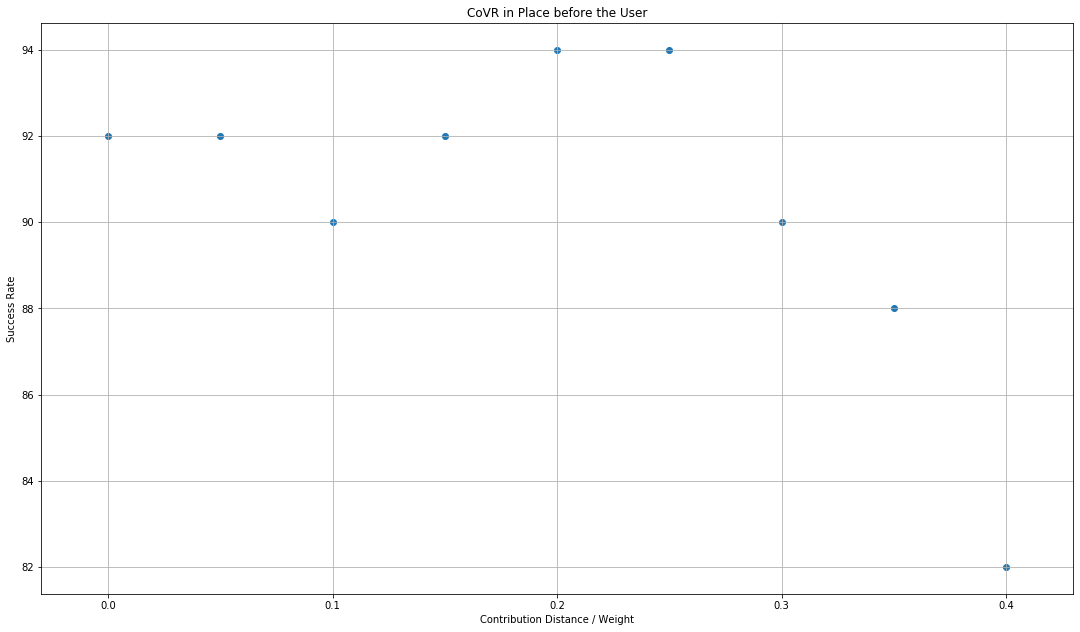

In [485]:
fig, axis = plt.subplots()
axis.set_xlabel('Contribution Distance / Weight')
axis.set_ylabel('Success Rate')
axis.set_title('CoVR in Place before the User')
axis.grid(True)
x = summaryPd.index
y = summaryPd['SuccessRate']

axis.scatter(x,y)
fig.set_size_inches(18.5, 10.5)

fig.savefig('./SummarySimulation/'+ name +'_MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
#axis.legend()
plt.show() 

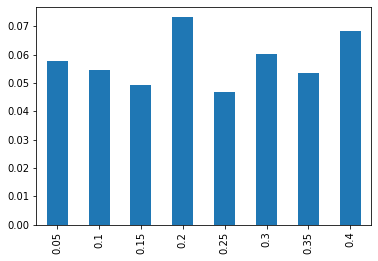

In [449]:
summaryPd['MeanDistanceTarget'].plot.bar()#yerr = summaryPd['StdDistanceTarget']/2)
#fig.savefig('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_MeanDistanceToTarget.png')


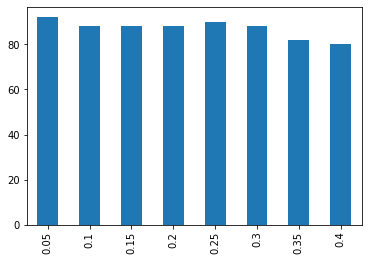

In [450]:
summaryPd['SuccessRate'].plot.bar()
#fig.savefig('./SummarySimulation/' + str(nbCibles) +'Cibles-Condition#'+ str(numCondition) +'-User#'+ name +'_BarChart-MaxSuccess' + str(summaryPd['SuccessRate'].max()) + '%.png')
